In [1]:
# scikit example of Clustering using K-means
# the goal is to look for structures in the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# we’re  interested in grouping the Customers according to their
# Annual Income and SpendingScore.
X = dataset.iloc[:, [3, 4]].values

In [5]:
# within-cluster sums of squares is a way to find the optimal number of clusters,
# otherwise, the number of clusters would be arbitrary
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


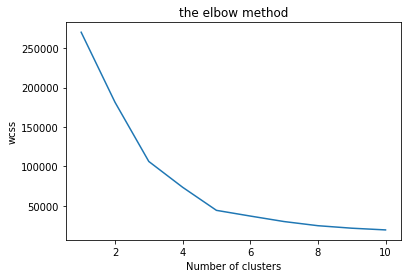

In [6]:
# we plot "the elbow method"
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [7]:
# 5 is the  optimal number
kmeans = KMeans(n_clusters=5, init= 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

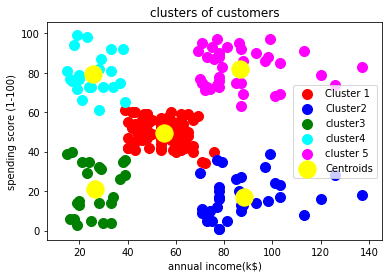

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',
           label = 'Centroids')
plt.title('clusters of customers')
plt.xlabel('annual income(k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()